# Different ways of fitting the splines

In [17]:
# General imports
import matplotlib.pyplot as plt
import numpy as np
import json

In [18]:
from ccs_fit.scripts.ccs_fetch import ccs_fetch

ccs_fetch(mode="CCS",DFT_DB="DFT.db",include_forces=True)

    Fetching data: 0it [00:00, ?it/s]


In [19]:
### Generate input.json file
input={
    "General": {
        "interface": "CCS",
        "merging"  : "True",
    },
    "Twobody": {
                "Xx-Xx": {
                        "Rcut": 6.0,
                        "Resolution": 0.5,
                        "Swtype": "sw",
                        "const_type" : "Mono",
                        "search_mode": "full",
                },
        }
}
#SAVE TO FILE
with open('CCS_input.json', 'w') as f:
    json.dump(input, f, indent=8)

In [4]:
#RUN FIT
from ccs_fit import ccs_fit

ccs_fit("CCS_input.json")

    Generating one-body information from training-set.
        Added elements:  ['O', 'Zn']
    Generating two-body potentials from one-body information.
    Adding pair: O-O
    Adding pair: O-Zn
    Adding pair: Zn-Zn
    Applying monotonous constraints for pair:  O-O
    Applying monotonous constraints for pair:  O-Zn
    Applying monotonous constraints for pair:  Zn-Zn


    Finding optimum switch: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 990/990 [00:09<00:00, 101.48it/s]


    The best switch is (8, 1, 4) with mse: 12.255, corresponding to distances of [6.01 1.69 3.87] Å for element pairs ['O-O', 'O-Zn', 'Zn-Zn'].
    Final root mean square error in energy:  0.3235637376416993  (eV/atoms) [NOTE: Only elements specified in Onebody are considered in atom count!]


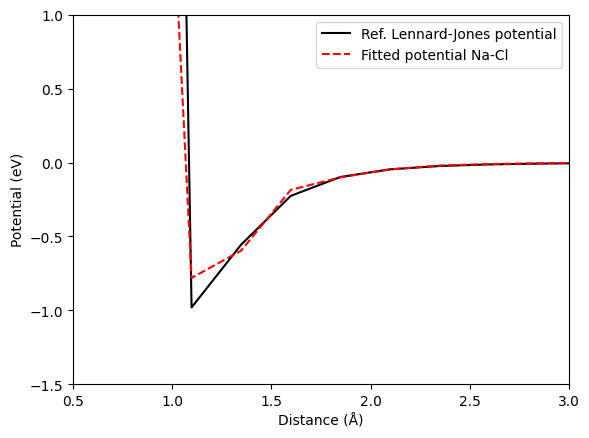

In [5]:
with open("CCS_params.json", "r") as f:
    CCS_params = json.load(f)

e = CCS_params["Two_body"]["O-Zn"]["spl_a"]

r=np.array(CCS_params["Two_body"]["O-Zn"]["r"])

plt.xlim(0.5,3)
plt.ylim(-1.5,1)
plt.xlabel('Distance (Å)')
plt.ylabel('Potential (eV)')
plt.plot(r,e,'--',color='red',label="Fitted potential")
plt.legend()
plt.show()

In [5]:
input={
    "General": {
        "interface": "CCS",
        "merging"  : "True",
    },
    "Twobody": {
                "O-O": {
                        "Rcut": 6.0,
                        "Resolution": 0.05,
                        "Swtype": "rep",
                        "const_type" : "Mono"
                },
                "O-Zn": {
                        "Rcut": 6.0,
                        "Resolution": 0.05,
                        "Swtype": "sw",
                        "const_type" : "Mono",
                        "search_mode": "range",
                        "range_center": 1.69,
                        "range_width": 0.5 # Å
                },
                "Zn-Zn": {
                        "Rcut": 6.0,
                        "Resolution": 0.05,
                        "Swtype": "sw",
                        "const_type" : "Mono",
                        "search_mode": "range",
                        "range_center": 3.87,
                        "range_width": 0.5 # Å
                }
        }
}
#SAVE TO FILE
with open('CCS_input.json', 'w') as f:
    json.dump(input, f, indent=8)

In [6]:
#RUN ADDTIONAL FIT

ccs_fit("CCS_input.json")

    Generating one-body information from training-set.
        Added elements:  ['O', 'Zn']
    Applying monotonous constraints for pair:  O-O
    Applying monotonous constraints for pair:  O-Zn
    Applying monotonous constraints for pair:  Zn-Zn
    Merging interval for pair O-Zn. Number of knots reduced from 93 to 91. 
    Merging interval for pair Zn-Zn. Number of knots reduced from 80 to 79. 
    Range search turned on for element pair O-Zn; 10 possible switch indices in range of 1.41-2.16 Å.
    Range search turned on for element pair Zn-Zn; 10 possible switch indices in range of 3.35-4.35 Å.


    Finding optimum switch: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.01it/s]


    The best switch is (77, 10, 40) with mse: 8.2223, corresponding to distances of [6.09 1.91 4.1 ] Å for element pairs ['O-O', 'O-Zn', 'Zn-Zn'].
    Final root mean square error in energy:  0.27276211886330215  (eV/atoms) [NOTE: Only elements specified in Onebody are considered in atom count!]


In [7]:
input={
    "General": {
        "interface": "CCS",
        "merging"  : "True",
    },
    "Twobody": {
                "O-O": {
                        "Rcut": 6.0,
                        "Resolution": 0.02,
                        "Swtype": "rep",
                        "const_type" : "Mono"
                },
                "O-Zn": {
                        "Rcut": 6.0,
                        "Resolution": 0.02,
                        "Swtype": "sw",
                        "const_type" : "Mono",
                        "search_mode": "range",
                        "range_center": 1.91,
                        "range_width": 0.2 # Å
                },
                "Zn-Zn": {
                        "Rcut": 6.0,
                        "Resolution": 0.02,
                        "Swtype": "sw",
                        "const_type" : "Mono",
                        "search_mode": "range",
                        "range_center": 4.1,
                        "range_width": 0.2 # Å
                }
        }
}
#SAVE TO FILE
with open('CCS_input.json', 'w') as f:
    json.dump(input, f, indent=8)

In [8]:
#RUN ADDTIONAL FIT

ccs_fit("CCS_input.json")

    Generating one-body information from training-set.
        Added elements:  ['O', 'Zn']
    Applying monotonous constraints for pair:  O-O
    Applying monotonous constraints for pair:  O-Zn
    Applying monotonous constraints for pair:  Zn-Zn
    Merging interval for pair O-Zn. Number of knots reduced from 230 to 224. 
    Merging interval for pair Zn-Zn. Number of knots reduced from 196 to 191. 
    Range search turned on for element pair O-Zn; 10 possible switch indices in range of 1.71-2.11 Å.
    Range search turned on for element pair Zn-Zn; 10 possible switch indices in range of 3.89-4.29 Å.


    Finding optimum switch: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:27<00:00,  3.66it/s]


    The best switch is (189, 29, 95) with mse: 5.9159, corresponding to distances of [6.03 2.01 4.01] Å for element pairs ['O-O', 'O-Zn', 'Zn-Zn'].
    Final root mean square error in energy:  0.28786153867860753  (eV/atoms) [NOTE: Only elements specified in Onebody are considered in atom count!]


In [9]:
input={
    "General": {
        "interface": "CCS",
        "merging"  : "True",
    },
    "Twobody": {
                "O-O": {
                        "Rcut": 6.0,
                        "Resolution": 0.01,
                        "Swtype": "rep",
                        "const_type" : "Mono"
                },
                "O-Zn": {
                        "Rcut": 6.0,
                        "Resolution": 0.01,
                        "Swtype": "sw",
                        "const_type" : "Mono",
                        "search_mode": "range",
                        "range_center": 2.01,
                        "range_width": 0.2 # Å
                },
                "Zn-Zn": {
                        "Rcut": 6.0,
                        "Resolution": 0.01,
                        "Swtype": "sw",
                        "const_type" : "Mono",
                        "search_mode": "range",
                        "range_center": 4.01,
                        "range_width": 0.2 # Å
                }
        }
}
#SAVE TO FILE
with open('CCS_input.json', 'w') as f:
    json.dump(input, f, indent=8)

In [10]:
#RUN FIT

ccs_fit("CCS_input.json")

    Generating one-body information from training-set.
        Added elements:  ['O', 'Zn']
    Applying monotonous constraints for pair:  O-O
    Applying monotonous constraints for pair:  O-Zn
    Applying monotonous constraints for pair:  Zn-Zn
    Merging interval for pair O-O. Number of knots reduced from 376 to 364. 
    Merging interval for pair O-Zn. Number of knots reduced from 458 to 436. 
    Merging interval for pair Zn-Zn. Number of knots reduced from 390 to 366. 
    Range search turned on for element pair O-Zn; 20 possible switch indices in range of 1.80-2.20 Å.
    Range search turned on for element pair Zn-Zn; 20 possible switch indices in range of 3.81-4.21 Å.


    Finding optimum switch: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [07:52<00:00,  1.18s/it]


    The best switch is (364, 67, 180) with mse: 5.1025, corresponding to distances of [5.9  2.1  3.92] Å for element pairs ['O-O', 'O-Zn', 'Zn-Zn'].
    Final root mean square error in energy:  0.28311138452162465  (eV/atoms) [NOTE: Only elements specified in Onebody are considered in atom count!]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 495/495 [00:07<00:00, 66.33it/s]


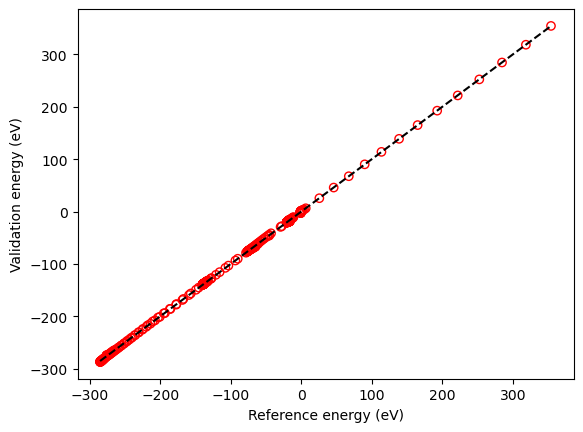

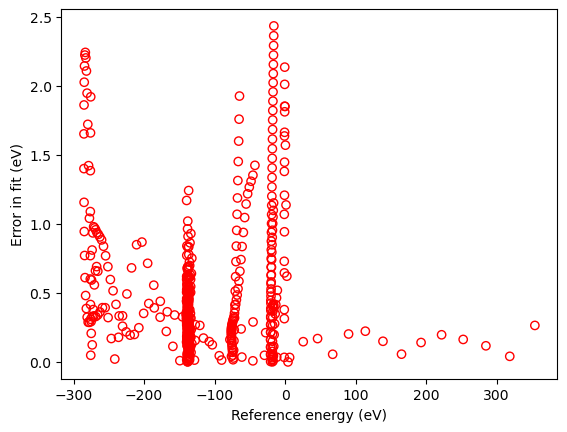

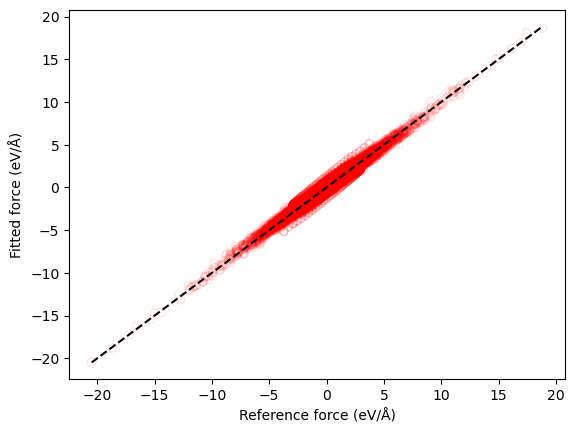

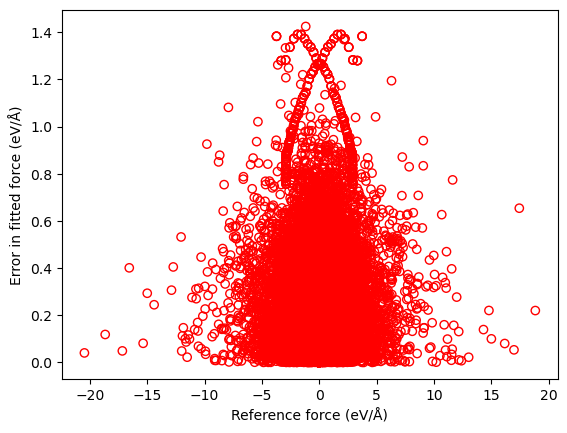

In [13]:
from ccs_fit.scripts.ccs_validate import ccs_validate
ccs_validate(mode="CCS", CCS_params="CCS_params.json", DFT_DB="DFT.db", include_forces=True)

with open("CCS_params.json", "r") as f:
    CCS_params = json.load(f)

with open("structures.json", "r") as f:
    training_set = json.load(f)

err=np.loadtxt("CCS_validate.dat")
plt.xlabel('Reference energy (eV)')
plt.ylabel('Validation energy (eV)')
plt.plot( [min(err[:,0]),max(err[:,0])],[min(err[:,0]),max(err[:,0])],'--',color='black'  )
plt.scatter(err[:,0],err[:,1],facecolors='none', edgecolors='red')
plt.show()
plt.xlabel('Reference energy (eV)')
plt.ylabel('Error in fit (eV)')
plt.scatter(err[:,0],err[:,2],facecolors='none', edgecolors='red')
plt.show()

err_F=np.loadtxt("CCS_validate_forces.dat")
plt.xlabel('Reference force (eV/Å)')
plt.ylabel('Fitted force (eV/Å)')
plt.plot( [min(err_F[:,0]),max(err_F[:,0])],[min(err_F[:,0]),max(err_F[:,0])],'--',color='black')
plt.scatter(err_F[:,0],err_F[:,1],facecolors='none', edgecolors='red',alpha=0.1 )
plt.show()

plt.xlabel('Reference force (eV/Å)')
plt.ylabel('Error in fitted force (eV/Å)')
plt.scatter(err_F[:,0],err_F[:,2],facecolors='none', edgecolors='red')
plt.show()

Buckingham fit (not optimised) for element pair Cl-Cl;     V(r) = -0.13*exp(-1.42*r) -(-1.61)/r^6.
Lennard Jones fit (not optimised) for element pair Cl-Cl;  V(r) = 4*0.00*((2.90/r)^12 - (2.90/r)^6)
Morse fit (not optimised) for element pair Cl-Cl;          V(r) = 0.00*(1-np.exp(-3.76*(r-3.84)))^2 + -0.00


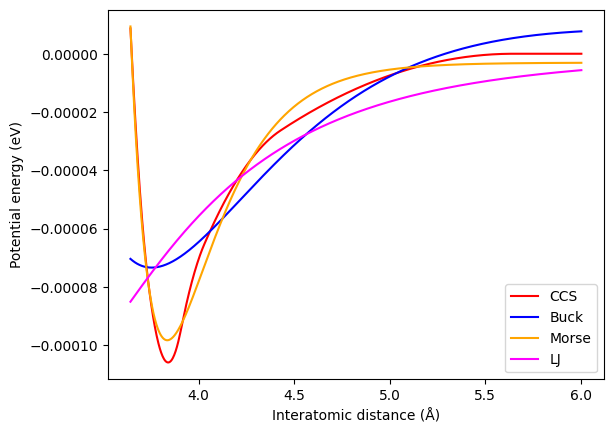

Buckingham fit (not optimised) for element pair Cl-Na;     V(r) = -629.56*exp(-4.19*r) -(-9.59)/r^6.
Lennard Jones fit (not optimised) for element pair Cl-Na;  V(r) = 4*0.99*((1.00/r)^12 - (1.00/r)^6)
Morse fit (not optimised) for element pair Cl-Na;          V(r) = 1.00*(1-np.exp(-5.18*(r-1.14)))^2 + -1.01


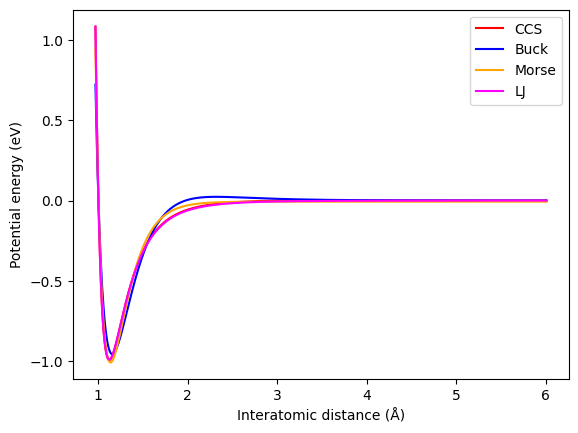

Buckingham fit (not optimised) for element pair Na-Na;     V(r) = -0.34*exp(-1.76*r) -(-0.69)/r^6.
Lennard Jones fit (not optimised) for element pair Na-Na;  V(r) = 4*19.40*((0.43/r)^12 - (0.43/r)^6)
Morse fit (not optimised) for element pair Na-Na;          V(r) = 0.00*(1-np.exp(-2.89*(r-3.82)))^2 + -0.00


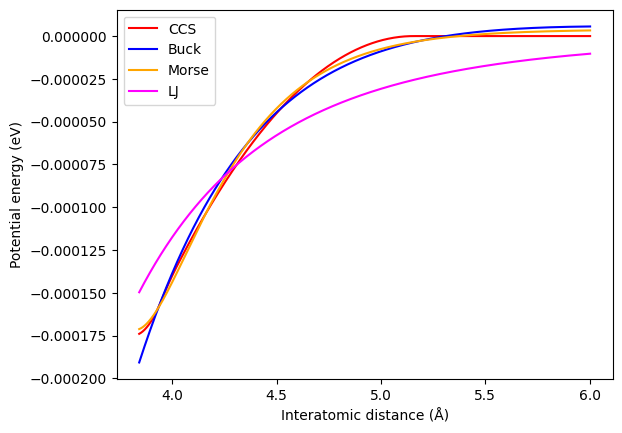

In [12]:
from ccs_fit.scripts.ccs_export_FF import write_FF

write_FF("CCS_params.json")

In [13]:
# Clean up files

import glob
import os

def rm(file):
    try:
        os.remove(file)
    except OSError:
        pass

list=glob.glob("CCS_*")
for file in list:
    rm(file)
rm("structures.json")
rm("ccs.spl")
rm("Buckingham.dat")
rm("Lennard_Jones.dat")
rm("Morse.dat")